# <center> Project 02: Application of classification in Marketing and Sales </center>

# Seminar goals:
In this project, we will develop and apply different supervised classification tecnhiques. These methodologies are broadly used in business to multiple use cases as:
- identify **new customers** in the market
- identify customers in our internal Data Warehouse with **more likely** to buy a new product
- identify unsatisfied customers and thus, likely to be **churners**
- classify text into categories for spam identification or to process messages or emails from our customers

During this project we will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering and finally, training and prediction. In particular, the main sections of this project are:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management) 
2. Model Training: training the baseline SVM and Decision Trees. Analysis of metrics (recall, precision, confusion metrics) and improvement the classification through several techniques as undersampling to balance or ensemble of models
3. Creating a Business opportunity with Machine Learning: selection of the best model and identification of the most important features



We will apply all these techniques to identify new customers to capture and improve sales in a **marketing use case**.

### Due date: up to June 17th, 23:55h. 
### Submission procedure: via Moodle.

*******

# 0. Context:  Using Machine Learning to increase our customers base

We work as a head of data science and AI in a new Internet of Things (IoT) company. Our company designs, builds and implements wireless IoT products.

Our marketing colleagues are planning to launch a new commercial campaign for capturing new customers. We have to decide which companies are the target to be visited by our sales managers. As the cost to send a sales manager to visit a potential customer is quite high, we have to select from the total market base, those companies that are more likely to buy any of our products and become a new customer. 

To support this new campaign, we are **using several of the most important classification techniques**. We will manage key evaluation aspects of a classification as **recall, precision, false positive, etc...** to decide which are the best potential customers. 


## 0.1 Dataset

In this practice we are using a new dataset named `market_dt.csv`. This file contains information of **IoT market**, i.e. companies that could be interested to buy IoT products or they have already. In particular, the detailed information for each customer is:
- *City*: Name of the city where the company is located
- *Customer_Flag*: It is a flag that is 1 for current customers and 0 for non-customers
- *Revenue*: The annual incomes of the company
- *Sector*: It's an integer that identifies the sector of the company's activity
- *CNT_EMPLOYEE*: Number of employees of the company
- *CNT_CB_DENSITY*: Number of companies close
- *CNT_CB_MOB_DENSITY*: Number of companies with mobile services
- *CNT_CB_FN_DENSITY*: Number of companies with fixed services
- *Legal_Form_Code*: It's an integer that identifies the legal type of the company: big, small or medium company
- *Mobile potential*: It's an estimation of the total annual expense that a company can do in telco services, including IoT

## 0.2. Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# 1. Data understanding and preparation

The first stage in any Machine Learning project is to have a clear understanding of the dataset from a statistical point of view but also from the perspective of the value of their variables to solve the use case or problem. To achieve this goal we need to "clean" and "transform" the data. All this process is known as **Data Wrangling**. In particular, the whole data wrangling process implies:
- Define and apply an strategy for nulls and coding for categorical variables
- Analyze the variables distribution and correlation between them
- Remove outliers
- etc....


Let's open the csv with separator ";" and assign to a dataframe variable (use read_csv from Pandas library). Let's see the top 5 elements.

In [6]:
market_dt = pd.read_csv('market_dt.csv', usecols={'City', 'Customer_Flag', 'Revenue', 'Sector', 'CNT_EMPLOYEE','CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY','CNT_CB_FN_DENSITY','Legal_Form_Code','Mobile_potential'}, sep=";")
market_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
0,Bremen,0,21339309.0,26.0,14.0,25,161.0,154.0,10.0,1783.999887
1,Steinfurt,0,NaN,74.0,4.0,50,41.0,41.0,1.0,1884.468150
2,Magdeburg,0,NaN,83.0,28.0,28,188.0,187.0,6.0,1938.651093
3,Leipzig,0,NaN,61.0,28.0,12,597.0,594.0,21.0,1602.187431
4,Tamm,0,NaN,74.0,4.0,37,336.0,334.0,10.0,1931.884908


[**EX1**] [**REPORT**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which are the variable with more nulls? And with no nulls? Why 'City' variables is considered as object type?

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

In [7]:
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                13335 non-null  object 
 1   Customer_Flag       13335 non-null  int64  
 2   Revenue             8589 non-null   float64
 3   Sector              13235 non-null  float64
 4   Legal_Form_Code     13229 non-null  float64
 5   CNT_EMPLOYEE        13335 non-null  int64  
 6   CNT_CB_DENSITY      10265 non-null  float64
 7   CNT_CB_MOB_DENSITY  10265 non-null  float64
 8   CNT_CB_FN_DENSITY   10265 non-null  float64
 9   Mobile_potential    13335 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.0+ MB


Once we have the first contact with the dataset, next step is to decide the strategy to apply to **nulls** values. There are several options as removing the rows with any **null**, assigning a constant value (e.g. median or mean value), etc.... In our case, we are removing the rows with **null** in any of the values.

[**EX2**] [**CODE**] Eliminate those rows which has nulls in any variable. Let's check that there is no nulls in any variable. Which is the size of the resulting dataset? 

In [8]:
vars=['City', 'Customer_Flag', 'Revenue', 'Sector', 'CNT_EMPLOYEE','CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY','Legal_Form_Code','Mobile_potential']
for x in vars:
    market_dt=market_dt[market_dt[x].isna()==False]
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                6987 non-null   object 
 1   Customer_Flag       6987 non-null   int64  
 2   Revenue             6987 non-null   float64
 3   Sector              6987 non-null   float64
 4   Legal_Form_Code     6987 non-null   float64
 5   CNT_EMPLOYEE        6987 non-null   int64  
 6   CNT_CB_DENSITY      6987 non-null   float64
 7   CNT_CB_MOB_DENSITY  6987 non-null   float64
 8   CNT_CB_FN_DENSITY   6987 non-null   float64
 9   Mobile_potential    6987 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 600.4+ KB


In Machine Learning, it is key to analyze the variables from a statistical point of view: knowing the distribution of each variable, their mean and median are key to identify any transformation to apply before training the model. 
Furthermore, due to we are training a classifier (in our case, to classify between ***customers*** and ***non customers***), this analysis should be done for both classes separetly.

[**EX3**] [**REPORT**] Create a `customer_dt` and `noncustomer_dt` datasets based on the `Customer_Flag` variable (`Customer_Flag`=1 for **customers** and 0 for **noncustomers**). Build a boxplot for the `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential` and `CNT_CB_Density` numeric variables for both datasets. Which are the main differences between `customer_dt` and `noncustomer_dt` datasets comparing these variables. Which is the dataset with `CNT_EMPLOYEE` higher? Which datasets have more outliers in `Revenues`? Which is the Q1, median (=Q2) and Q3 for `Revenues` and `Mobile_potential`?


Tip: you may have to use the [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) function.

In [9]:
##creation of the 2 datasets
customer_dt=market_dt[market_dt['Customer_Flag']==1]
noncustomer_dt=market_dt[market_dt['Customer_Flag']==0]

In [10]:
customer_dt   ##show customer_dt

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
11548,Haar,1,4000000.0,42.0,14.0,13,891.0,867.0,62.0,1778.004205
11551,Greding,1,11780000.0,74.0,4.0,50,7.0,7.0,0.0,1899.663564
11553,Dörth,1,2050000.0,43.0,14.0,16,30.0,30.0,1.0,1655.520125
11554,Frankfurt,1,853500.0,63.0,14.0,13,870.0,842.0,77.0,1548.507315
11565,Benningen,1,10680000.0,74.0,4.0,16,319.0,317.0,10.0,1746.128813
...,...,...,...,...,...,...,...,...,...,...
13306,Leipzig,1,3535693.0,71.0,14.0,18,640.0,637.0,19.0,1916.855586
13307,Langenfeld,1,1462624.0,40.0,14.0,11,476.0,470.0,20.0,1916.126623
13312,Erkrath,1,1200000.0,55.0,14.0,11,699.0,694.0,37.0,1532.125178
13314,Günzburg,1,1830000.0,27.0,14.0,24,44.0,43.0,4.0,2009.305077


In [11]:
noncustomer_dt   ##show noncustomer_dt

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
0,Bremen,0,21339309.0,26.0,14.0,25,161.0,154.0,10.0,1783.999887
5,Düsseldorf,0,8500000.0,59.0,14.0,27,869.0,857.0,59.0,2187.053822
6,Halle,0,2100000.0,73.0,20.0,35,209.0,206.0,9.0,2017.911602
8,Stuttgart,0,630000.0,56.0,14.0,10,749.0,727.0,51.0,1390.181234
9,Porta Westfalica,0,149400000.0,43.0,22.0,47,110.0,107.0,4.0,1774.375387
...,...,...,...,...,...,...,...,...,...,...
11542,Grimma,0,6391606.0,60.0,20.0,19,57.0,57.0,0.0,2006.059998
11543,Schönberg,0,305000.0,60.0,4.0,13,9.0,9.0,0.0,1231.304840
11544,Freiberg,0,4200000.0,23.0,14.0,50,62.0,62.0,6.0,1958.236002
11545,Solms,0,1336495.0,60.0,16.0,16,63.0,61.0,2.0,1703.188202


Revenue customer quantiles (q3,q2,q1): 4195000.0 2200000.0 1047500.0
Revenue noncustomer quantiles (q3,q2,q1): 3501123.5 1750000.0 902986.0
Mobile_potential customer quantiles (q3,q2,q1): 2116.47407406108 1948.4376609395997 1621.0556861314792
Mobile_potential noncustomer quantiles (q3,q2,q1): 2035.08284022468 1797.0542780039395 1513.3835966627996


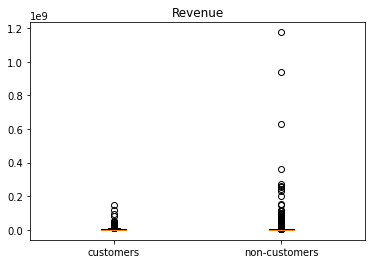

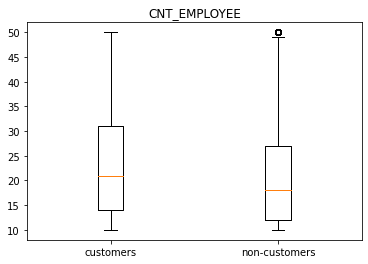

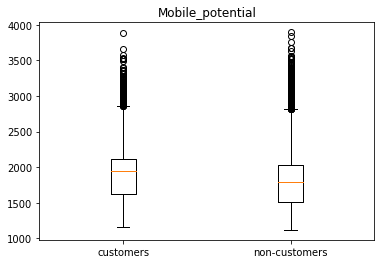

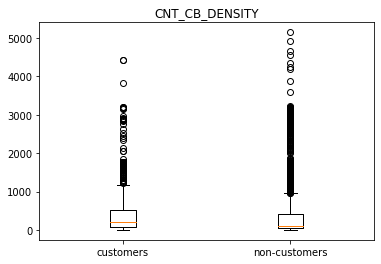

In [12]:
####boxplots comparing customer_dt and noncustomer_dt
q3, M, q1 = np.percentile(customer_dt['Revenue'], [75 , 50, 25])
print("Revenue customer quantiles (q3,q2,q1):",q3,M,q1)
q3, M, q1 = np.percentile(noncustomer_dt['Revenue'], [75 , 50, 25])
print("Revenue noncustomer quantiles (q3,q2,q1):",q3,M,q1)

fig1, ax1 = pyplot.subplots()
ax1.boxplot([customer_dt['Revenue'], noncustomer_dt['Revenue']], 
    labels=["customers", "non-customers"])
ax1.set_title("Revenue")

fig2, ax2 = pyplot.subplots()
ax2.boxplot([customer_dt['CNT_EMPLOYEE'], noncustomer_dt['CNT_EMPLOYEE']], 
    labels=["customers", "non-customers"])
ax2.set_title("CNT_EMPLOYEE")

q3, M, q1 = np.percentile(customer_dt['Mobile_potential'], [75 , 50, 25])
print("Mobile_potential customer quantiles (q3,q2,q1):",q3,M,q1)
q3, M, q1 = np.percentile(noncustomer_dt['Mobile_potential'], [75 , 50, 25])
print("Mobile_potential noncustomer quantiles (q3,q2,q1):",q3,M,q1)

fig3, ax3 = pyplot.subplots()
ax3.boxplot([customer_dt['Mobile_potential'], noncustomer_dt['Mobile_potential']], 
    labels=["customers", "non-customers"])
ax3.set_title("Mobile_potential")

fig4, ax4 = pyplot.subplots()
ax4.boxplot([customer_dt['CNT_CB_DENSITY'], noncustomer_dt['CNT_CB_DENSITY']], 
    labels=["customers", "non-customers"])
ax4.set_title("CNT_CB_DENSITY")

pyplot.show()

As we observe from the boxplots, some of them present outliers. There are several mechanisms to eliminate outliers. One option is to eliminate the values higher than a statistical value for each numerical variable.

[**EX4**] [**CODE**] Remove the values higher than 5* IQR for each variable: `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`and `CNT_CB_FN_DENSITY`. Compare with the boxplot of the previous exercise [**EX3**] and explain the differences.

In [13]:
##removing the values for customer_dt
columns = ['Revenue', 'CNT_EMPLOYEE', 'Mobile_potential', 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY']

for c in columns:
    q3, q1 = np.percentile(customer_dt[c], [75 ,25])
    iqr = q3-q1
    y = 5*iqr
    customer_dt = customer_dt[customer_dt[c] < y]

In [14]:
##removing the values for noncustomer_dt
for c in columns:
    q3, q1 = np.percentile(noncustomer_dt[c], [75 ,25])
    iqr = q3-q1
    y = 5*iqr
    noncustomer_dt = noncustomer_dt[noncustomer_dt[c] < y]

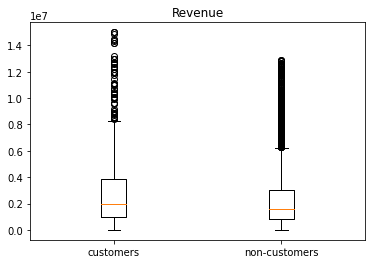

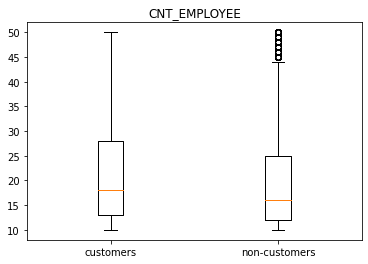

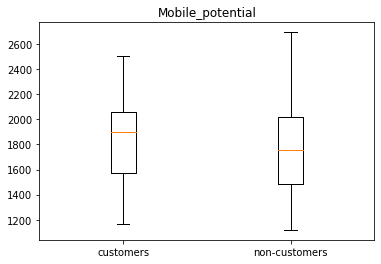

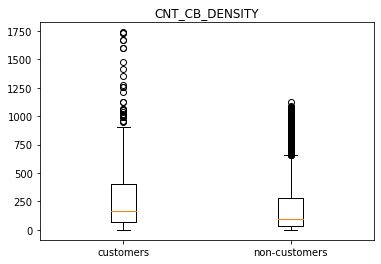

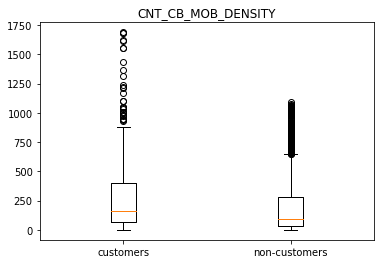

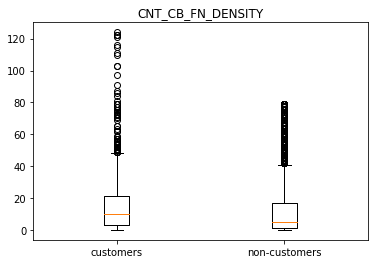

In [15]:
for c in columns:
    fig, ax = pyplot.subplots()
    ax.boxplot([customer_dt[c], noncustomer_dt[c]],
        labels=["customers", "non-customers"])
    ax.set_title(c)
    pyplot.show()

On the other hand, before applying any classification algorithm, it is necessary to transform non-numerical variables. The most common transformations are **coding as integer** or **coding as dummies**. Before deciding the mechanism it is important to analyze, for each categorical variable, their number of different values and their frequencies. In case of high number of possible values in comparision with the size of the dataset, **dummy** transformation could generate sparse matrix.

[**EX5**] [**REPORT**] Calculate the ratio of the values of `City` for `customer_dt` and `noncustomer_dt` datasets. Compare the ratio of each category of each dataset.

In [16]:
print("Ratio of the values of City for customer_dt:")
print(customer_dt["City"].value_counts(normalize=True))

print("\nRatio of the values of City for noncustomer_dt:")
print(noncustomer_dt["City"].value_counts(normalize=True))

Ratio of the values of City for customer_dt:
Köln           0.021818
Chemnitz       0.019394
Frankfurt      0.014545
Stuttgart      0.013333
Leipzig        0.010909
                 ...   
Blaichach      0.001212
Meißen         0.001212
Oberhaching    0.001212
Neuried        0.001212
Biebesheim     0.001212
Name: City, Length: 503, dtype: float64

Ratio of the values of City for noncustomer_dt:
Köln              0.016183
Stuttgart         0.010166
Bremen            0.010166
Dortmund          0.009544
Dresden           0.008921
                    ...   
Greußen           0.000207
Herzfelde         0.000207
Burghausen        0.000207
Treuenbrietzen    0.000207
Dettenhausen      0.000207
Name: City, Length: 2114, dtype: float64


As the number of distinct values is high, we will apply a **integer** encoding through the LabelEncoder() transformation as follows:

In [17]:
City_Categ=customer_dt['City'].append(noncustomer_dt['City'])

In [18]:
city_encoder=LabelEncoder()
city_encoder.fit(City_Categ.values)
customer_dt['City_coded']=city_encoder.transform(customer_dt['City'].values)
noncustomer_dt['City_coded']=city_encoder.transform(noncustomer_dt['City'].values)

In [19]:
customer_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,City_coded
11548,Haar,1,4000000.0,42.0,14.0,13,891.0,867.0,62.0,1778.004205,777
11551,Greding,1,11780000.0,74.0,4.0,50,7.0,7.0,0.0,1899.663564,715
11553,Dörth,1,2050000.0,43.0,14.0,16,30.0,30.0,1.0,1655.520125,438
11554,Frankfurt,1,853500.0,63.0,14.0,13,870.0,842.0,77.0,1548.507315,584
11565,Benningen,1,10680000.0,74.0,4.0,16,319.0,317.0,10.0,1746.128813,203


[**EX5**] [**CODE**] Finally before entering in the training stage,  let's create a `final_dataset` that is the result of stacking `customer_dt` and `noncustomer_dt` considering the following variables: `City_coded`, `Revenue`, `Sector`, `Legal_Form_Code`, `CNT_EMPLOYEE`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`, `CNT_CB_FN_DENSITY` and `Mobile_potential`. The 'final_dataset' should include a new variable, `Target`, that takes value **0** for noncustomers and **1** for customers registers. The `Target` will distiguish the two classes to train the model.

In [20]:
customer_dt["Target"] = 1
noncustomer_dt["Target"] = 0
final_dataset = customer_dt.append(noncustomer_dt).reset_index().drop("index", axis = 1)

final_dataset.head()
columns = ['City_coded']
old_columns = list(final_dataset.columns.values[2:])
old_columns.pop(-2)

for c in old_columns:
    columns.append(c)

final_dataset = final_dataset.loc[:, columns]

In [21]:
final_dataset.head()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
0,777,4000000.0,42.0,14.0,13,891.0,867.0,62.0,1778.004205,1
1,715,11780000.0,74.0,4.0,50,7.0,7.0,0.0,1899.663564,1
2,438,2050000.0,43.0,14.0,16,30.0,30.0,1.0,1655.520125,1
3,584,853500.0,63.0,14.0,13,870.0,842.0,77.0,1548.507315,1
4,203,10680000.0,74.0,4.0,16,319.0,317.0,10.0,1746.128813,1


In [22]:
final_dataset.tail()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
5640,726,6391606.0,60.0,20.0,19,57.0,57.0,0.0,2006.059998,0
5641,1844,305000.0,60.0,4.0,13,9.0,9.0,0.0,1231.304840,0
5642,588,4200000.0,23.0,14.0,50,62.0,62.0,6.0,1958.236002,0
5643,1890,1336495.0,60.0,16.0,16,63.0,61.0,2.0,1703.188202,0
5644,972,4593054.0,64.0,14.0,41,90.0,90.0,5.0,1985.888315,0


In [23]:
final_dataset["Target"].value_counts()

0    4820
1     825
Name: Target, dtype: int64

To measure the quality of our classifiers, it is necessary to train and test the models with different datasets. For this objective we will use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to generate 4 new datasets: 2 for training and 2 for test: 
- `X_train`: contains all variables except `Target` for the 80% of `final_dataset`,
- `y_train`: contains `Target` variables for the 80% of `final_dataset`, 
- `X_test`: contains all variables except `Target` for the 20% of `final_dataset`,
- `y_test`: contains `Target` variables for the 20% of `final_dataset`.

In [24]:
X_train, X_test, y_train, y_test= train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.20, random_state=42) 

[**EX6**] [**REPORT**] Calculate the lenght of `X_train` and `X_test` datasets. Is it aligned with the `test_size` value selected in the split?

In [25]:
print("X_train length:", len(X_train))

X_train length: 4516


In [26]:
print("X_test length:", len(X_test))

X_test length: 1129


[**EX7**] [**REPORT**] Draw the histograms of `y_train`and `y_test`. Is the dataset balanced (similar number of rows for each class or Target) or imbalanced ? How do you think it could affect to quality of the classifier?

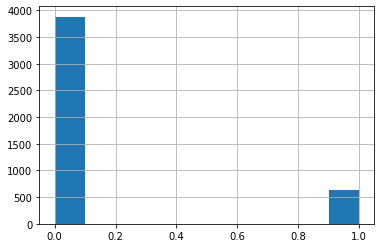

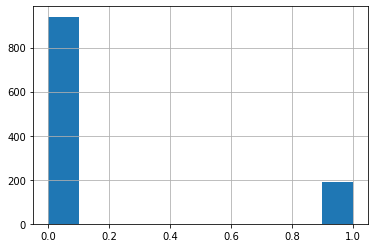

In [27]:
fig1, ax1 = pyplot.subplots()
ax1.grid()
plt.hist(y_train)

fig2, ax2 = pyplot.subplots()
ax2.grid()
plt.hist(y_test)

pyplot.show()

# 2. Model Training: from baseline models to ensemble¶

Now we are ready to enter in the training stage of the machine learning models. The common way to procedure is starting with baseline models (i.e. SVM, Decision Trees, Naive Bayes, etc....) and later, try to improve it adjusting hyperparameters of the models or creating more complex models architectures as ensembles.

## 2.1. Baseline of models: Training and evaluation

In the following section we are training a SVM, Decision Tree and Naive Bayes algorithms. To do it, we will use the `X_train` and `y_train` datasets.
Later on we will evaluate the performance (i.e. **accuracy**, **confusion matrix**, **recall** and **precision**) of each model with the `test` dataset, i.e. `X_test` and `y_test`.


Tip 1: You may use [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from Sklearn library to calculate the **precision**, **recall** of the model.

Tip 2: You may use [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from Sklearn library to calculate the confusion matrix of a model.

Tip 3: When using Sklearn library, you may use the function **.score(X_test, y_test)** to calculate the accuracy value.

### Classification with a SVM model

[**EX8**] [**CODE**] Train the SVM classifier of the Sklearn library. Evaluate the following metrics for kernel="rbf":
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is the algorithm classifying both classes (Target=0 and Target=1) in a similar way? Why?
- Compare the **precision** and **recall** of the **training** dataset (i.e. `X_train` and `y_train`) vs the **test** dataset (i.e. `X_test` and `y_test`). Which is better? Why? Which is the correct measure to estimate the performance for other unseen datasets? Why?

In [28]:
#### --- Training ==> Support Vector Classification
model_SVC = SVC() # Create the model based SVC and kernel by defaul is "rbf"
model_SVC.fit(X_train, y_train) # Train the model with the training samples: X_train and y_train

#### --- Testing
y_pred_SVC = model_SVC.predict(X_test) # Test the trained model with test samples

#### --- Accuracy
result_SVC = model_SVC.score(X_test, y_test) # Print the score of the trained model
print("SVC Accuracy:", result_SVC,"\n")

#### --- Precision and recall
print(classification_report(y_test, y_pred_SVC))

#### --- Confusion matrix (C).
# Note that Cij is equal to the number of observations known to be in group "i" and predicted to be in group "j".
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_SVC))

SVC Accuracy: 0.8352524357838795 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       940
           1       1.00      0.02      0.03       189

    accuracy                           0.84      1129
   macro avg       0.92      0.51      0.47      1129
weighted avg       0.86      0.84      0.76      1129

Confusion matrix
[[940   0]
 [186   3]]


##### Is the algorithm classifying both classes (Target=0 and Target=1) in a similar way? Why?
The algorithm is not classifying both classes equally by any means. The primary difference is clearly the recall. While the noncustomers have a very good recall (all noncustomers have been predicted as noncustomers), the customers have a very poor result. From the 189 customers, only 3 have been actually predicted as customers.

Whith these results we can conclude that the algorithm, as of right now, does not classify the customers adequately.

In [29]:
#### Comparing the precision and recall obtained with test dataset and the ones obtained with the training dataset
y_pred_SVC_2 = model_SVC.predict(X_train)
print(classification_report(y_train, y_pred_SVC_2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3880
           1       1.00      0.01      0.02       636

    accuracy                           0.86      4516
   macro avg       0.93      0.50      0.47      4516
weighted avg       0.88      0.86      0.80      4516



##### Which is better? Why? Which is the correct measure to estimate the performance for other unseen datasets? Why?

The results of the prediction that uses the training dataset are slightly better for the noncustomers, and almost identical for customers. This is completely reasonable, since the model has been trained with the purpose of minimizing the classification error of the training dataset.

Taking this into account, it is quite clear that the correct measure to estimate the performance of unseen datasets is the one obtained with the test dataset. By construction, the training dataset will always give the best possible result, but the purpose of the model is to be able to predict the behaviour of unseen data. Since the test dataset has not been used in the training stage, the results of its prediction will represent more accurately the performance of the model.

### Classification with a Decision Tree model

[**EX9**] [**CODE**] Train the Decision Tree algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Decision Tree algorithm working better than SVM? Why?

In [30]:
#### --- Training ==> Decission Tree Classifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

#### --- Testing
y_pred_DT = model_DT.predict(X_test)

#### --- Accuracy
result_DT = model_DT.score(X_test, y_test)
print("DT Accuracy:", result_DT, "\n")

#### --- Precision and recall
print(classification_report(y_test, y_pred_DT))

#### --- Confusion matrix (C).
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_DT))

DT Accuracy: 0.7767936226749336 

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       940
           1       0.34      0.36      0.35       189

    accuracy                           0.78      1129
   macro avg       0.61      0.61      0.61      1129
weighted avg       0.78      0.78      0.78      1129

Confusion matrix
[[809 131]
 [121  68]]


##### Is Decision Tree algorithm working better than SVM? Why?

It is hard to give a conclusive answer to this question, since the reasoning of which algorithm is better depends on the application. In this case we can see that the DT model has a much better recall for the customers, but at the cost of precision, which has been almost divided by 3. The behaviour for the customers is similar (DT has a slightly better precision but worse recall)

In our marketing application, it is probably more important to have a high precision when classifying customers, since it will make the campaign much more cost-effective. This reasoning would suggest that the SVM model is preferable. However, only classifying adequately a 2% of all the samples known to be customers is a very poor result, and depending on the situation it might even be useless.

Therefore, it is pretty safe to say that both models are pretty bad.

### Comparing algorithm consistenly: KFold cross-validation

When we are looking for the best algorithm to classify a dataset, it is very useful to compare all of them. Besides, to protect the training from **overfitting** and calculate the performance with less variance than a single train-test split, it is uselful to apply **K-Fold cross-validation**. The way that KFolds works is splitting the dataset into k-parts or **fold** (e.g. k = 3, 5 or k = 10). The algorithm is trained on k − 1 folds with one held back and tested on the held back fold.

[**EX10**] [**CODE**] Train a SVM and Decision Tree algorithms using a KFold cross-validation with **k=5** and calculate the **mean** and **standard deviation** of the **accuracy**. Plot a boxplot of the accuracy for every model. Which is the model with better mean value of the accuracy? Which is the algorithm with less deviation on the accuracy?  

Tip 1: You may use [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to apply cross-validation.

Model SVM with accuracy (mean): 0.8596093160458256 and accuracy (std): 0.01098355910448841
Model Decision_trees with accuracy (mean): 0.7732521388880722 and accuracy (std): 0.019358946715451134


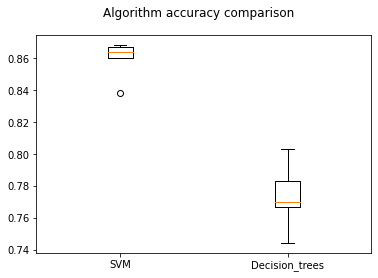

In [31]:
## Models to cross-validate
models = []
models.append(('SVM', SVC()))
models.append(('Decision_trees', DecisionTreeClassifier()))

# Evaluate each model
results = []
names = []
scoring_metric = 'accuracy'

for name_model, model in models:
    kfold = KFold(n_splits=5, random_state=10, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
                                 scoring=scoring_metric)
    results.append(cv_results)
    names.append(name_model)
    print ("Model", name_model, "with accuracy (mean):", cv_results.mean(),
           "and accuracy (std):", cv_results.std())

# Our boxplot for algorithm comparison
fig = pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

##### Which is the model with better mean value of the accuracy?
The model with better mean value of the accuracy is, by a relatively high margin, the SVM model. Not only is the mean better, but its worst accuracy value is still better than the best value obtained with the Decision Tree model.

##### Which is the algorithm with less deviation on the accuracy?
Again, the algorithm with less deviation on the accuracy is SVM.

##### Conclusion
All in all, with these results we can conclude with confidence that, in order to classify our dataset, the SVM algorithm has higher accuracy than the Decision Tree algorithm.

## 2.2 Improving the model

As we observe from the baseline models, even though the accuracy is over 70% the classifiers don't distinguish properly both classes, i.e. **Target=1** and **Target=0**.  
In this scenario, we should apply another strategies to improve the perfomance. There are several options: from adjusting the balance of the classes or doing the fine tuning of the hyperparameters of the models (for instance the type of kernel in SVM or the minimum number of samples per leaf in Decision Tree) to combine differents models to create ensembles.
In this section, we will evaluate our classifiers in two ways:
- Forcing the balancing of both classes
- Building ensembles of models

### Balancing the dataset

Let's check the type of balancing we have in our training and test datasets.

[**EX11**][**CODE**] Split the previous `final_dataset` in two datasets: `customer_dt` for class 1 and `noncustomer_dt` for class 0. Calculate the number of samples for the **customers** class (i.e. Target=1) and for the **noncustomers** class (i.e. Target=0). Is the `final_dataset` balanced or imbalanced? Explain two options to match both datasets.


In [32]:
customer_dt = final_dataset[final_dataset['Target'] == 1]
noncustomer_dt = final_dataset[final_dataset['Target'] == 0]

print("Number of samples for the customers class:", len(customer_dt))
print("Number of samples for the noncustomers class:", len(noncustomer_dt))

Number of samples for the customers class: 825
Number of samples for the noncustomers class: 4820


##### Is the final_dataset balanced or imbalanced?
It is imbalanced. As we can see above, the number of samples the datasets is not equally proportioned, since the noncustomers class has a lot more samples. Therefore, we can conclude that the original dataset is imbalanced.

##### Explain two options to match both datasets
Two of the most common and simple strategies when trying to balance a dataset is **undersampling** and **oversampling**.

The first approach consists on randomly removing a certain amount of samples from the majority class. This procedure can only be performed if there are enough samples, although it should be noted that it's not ideal since we are losing potentially useful information.

On the other hand, oversampling adds new samples to the minority class. In its most basic form, the samples added are repetitions of the already available samples of the class. Another possibility is to oversample with Gaussian noise.

Academic studies seem to suggest that undersampling usually performs slightly better than oversampling. The SMOTE algorithm has also gained popularity when it comes to balancing, since it oversamples the minority class while downsampling the majority calss at the same time. Even then, there have been recent efforts in finding alternatives that don't involve the loss of information. These alternatives usually require some sort of weighting.


Let's undersample the `noncustomer_dt` to balance both datasets:

In [33]:
noncustomer_dt_sample=noncustomer_dt.sample(840)
print("The new number of samples in noncustomer dataset is:", len(noncustomer_dt_sample))

The new number of samples in noncustomer dataset is: 840


If we append both datasets, the **customer_dt** and the **noncustomer_dt_sample**, the new `final_dataset` looks like:

<AxesSubplot:>

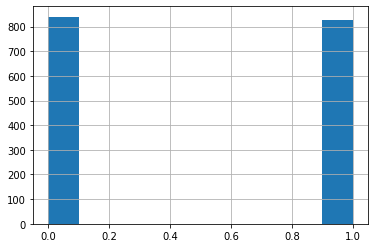

In [34]:
final_dataset = customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis=1)
final_dataset = final_dataset.loc[:,['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential','Target']]
final_dataset.Target.hist()

[**EX12**][**CODE**][**REPORT**] Train a SVC and Decision Tree algorithm with the new `final_dataset`. Evaluate the **recall**, **precision** and **confusion matrix** of all 3 models.
- Which has better accuracy?
- Which is the model with better recall? And accuracy?
- Which model you recommend to classify both classes? Justify your answer


####### SVM
Confusion matrix
[[118  37]
 [104  74]]
              precision    recall  f1-score   support

           0       0.53      0.76      0.63       155
           1       0.67      0.42      0.51       178

    accuracy                           0.58       333
   macro avg       0.60      0.59      0.57       333
weighted avg       0.60      0.58      0.57       333

Model SVM with accuracy (mean): 0.5150009856100926 and accuracy (std): 0.016230630173261908

####### Decision_trees
Confusion matrix
[[ 93  62]
 [ 67 111]]
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       155
           1       0.64      0.62      0.63       178

    accuracy                           0.61       333
   macro avg       0.61      0.61      0.61       333
weighted avg       0.61      0.61      0.61       333

Model Decision_trees with accuracy (mean): 0.5667624116470952 and accuracy (std): 0.038108440834388344


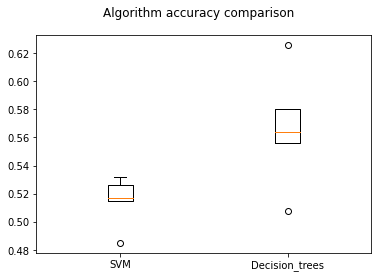

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.20, random_state=42)

# Models to cross-validate
models = []
models.append(('SVM', SVC()))
models.append(('Decision_trees', DecisionTreeClassifier()))

# Evaluate each model
results = []
names = []
scoring_metric = 'accuracy'

for name_model, model in models:
    print("\n#######", name_model)
    #### --- Cross validation
    kfold = KFold(n_splits=5, random_state=10, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, 
        scoring=scoring_metric)
        
    #### --- Training
    model.fit(X_train, y_train)

    #### --- Testing
    y_pred = model.predict(X_test)

    #### --- Confusion matrix (C).
    print("Confusion matrix")
    print(confusion_matrix(y_test, y_pred))

    #### --- Precision and recall
    print(classification_report(y_test, y_pred))

    #### --- Accuracy
    results.append(cv_results)
    names.append(name_model)
    print ("Model", name_model, "with accuracy (mean):", cv_results.mean(),
           "and accuracy (std):", cv_results.std())

# Boxplot for algorithm accuracy comparison
fig = pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

##### Which has better accuracy?
Now the roles have reverse and the Decision trees algorithm has better accuracy (its mean is higher and its worst value is better than the best accuracy value for the SVM model). The standard deviation of the accuracy of the DT model is worse though.

##### Which is the model with better recall? And precision?
The DT algorithm has better recall for the noncustomers class and, more importantly, for the customers class. It should be pointed out that the difference in recall for the customers class is remarkable. Regarding precisionm, the DT model has better results too for both classes.

##### Which model you recommend to classify both classes? Justify your answer.
Considering the previous results, it is pretty clear that the DT algorithm has an advantage over the SVM model when it comes to our dataset, so we recommend using the DT algorithm. It should be noted though that the results are pretty average, so it should not be seen as the perfect solution and its results should be taken with a grain of salt.

### Ensembling models

Another mechanism to improve the performance of a classifier is to combine several algorithms. The three most popular methods for combining models are:
- Bagging combines multiple models that are trained with different subsamples of the training dataset.
- Boosting combines multiple models in cascade and each of them learns to fix the prediction errors of the prior model.
- Voting combines statistically the output of several models.

Usually Bagging and Boosting are formed by models of the same type meanwhile voting could be formed by different models.

### Voting ensemble

[**EX13**][**CODE**][**REPORT**] Build a **voting** ensemble formed by a SVM and Decision Tree and train it with the balanced training dataset. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to build this type of ensemble.

In [36]:
# Models to ensemble
models = []
models.append(('SVM', SVC()))
models.append(('Decision_trees', DecisionTreeClassifier()))
vot_ensemb = VotingClassifier(models)

print("\n####### Voting Ensemble")
#### --- Cross validation
kfold = KFold(n_splits=5, random_state=10, shuffle=True)
cv_results = cross_val_score(vot_ensemb, X_train, y_train, cv=kfold, 
    scoring=scoring_metric)

#### --- Training
vot_ensemb.fit(X_train, y_train)

#### --- Testing
y_pred = vot_ensemb.predict(X_test)

#### --- Confusion matrix (C).
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))

#### --- Precision and recall
print(classification_report(y_test, y_pred))

#### --- Accuracy
print ("Voting Ensemble with accuracy (mean):", cv_results.mean(),
        "and accuracy (std):", cv_results.std())


####### Voting Ensemble
Confusion matrix
[[136  19]
 [136  42]]
              precision    recall  f1-score   support

           0       0.50      0.88      0.64       155
           1       0.69      0.24      0.35       178

    accuracy                           0.53       333
   macro avg       0.59      0.56      0.49       333
weighted avg       0.60      0.53      0.48       333

Voting Ensemble with accuracy (mean): 0.530745402832925 and accuracy (std): 0.028968120035500804


##### Is it better than any of the previous baseline models? Justify your answer.

The results, in general, are not better than the decision tree baseline model. Although we have gained an improvement regarding the recall for the noncustomers class and a slight higher value of the precision of the customers class, we now have a much worse result for the recall of the customers class. 

Since the most important class for our application is the customers class, and the very slight improvement in precision does not justify the loss in recall, we can conclude more or less safely that the voting ensemble is not better than the baseline model of the DT.

The reason behind this result might be related with the fact that we have found the SVM algorithm to be worse in mosts regards when compared to the DT, so adding it to the ensemble model does not provide any benefit (quite the contrary).

### Bagging ensemble: Random Forest

[**EX14**][**CODE**][**REPORT**] Build a **Bagging** ensemble based on Random Forest. Random Forest is considered a bagging ensemble formed by Decision Trees algorithms. Train the Random Forest with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to build this type of ensemble.

In [37]:
# Model to fit
rand_forest = RandomForestClassifier()

print("\n####### Random Forest Ensemble")
#### --- Cross validation
kfold = KFold(n_splits=5, random_state=10, shuffle=True)
cv_results = cross_val_score(rand_forest, X_train, y_train, cv=kfold, 
    scoring=scoring_metric)

#### --- Training
rand_forest.fit(X_train, y_train)

#### --- Testing
y_pred = rand_forest.predict(X_test)

#### --- Confusion matrix (C).
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))

#### --- Precision and recall
print(classification_report(y_test, y_pred))

#### --- Accuracy
print ("Random Forest Ensemble with accuracy (mean):", cv_results.mean(),
        "and accuracy (std):", cv_results.std())


####### Random Forest Ensemble
Confusion matrix
[[ 98  57]
 [ 62 116]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       155
           1       0.67      0.65      0.66       178

    accuracy                           0.64       333
   macro avg       0.64      0.64      0.64       333
weighted avg       0.64      0.64      0.64       333

Random Forest Ensemble with accuracy (mean): 0.6141223846132184 and accuracy (std): 0.024248533742798725


##### Is it better than any of the previous baseline models? Justify your answer.

In this case the results are very similar to the ones obtained with the baseline model for the Decision Tree. This is definitely expected, since the Random Forest is just a bagging ensemble of Decision Trees. Therefore, we should just expect to get similar results but with lower variance.

In this instance, besides getting a lower variance, we also get slightly improved results for the customer class for both the precision and the recall. Therefore, we can conclude that the random forest ensemble performs better than the baseline model of the Decision Tree.

[**EX15**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the Random Forest model for class 0 and class 1.

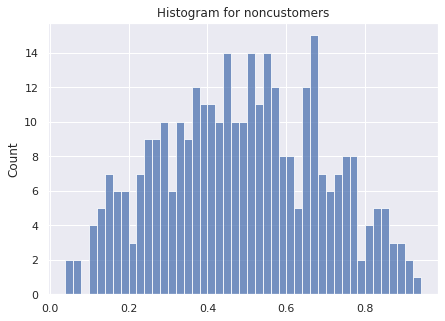

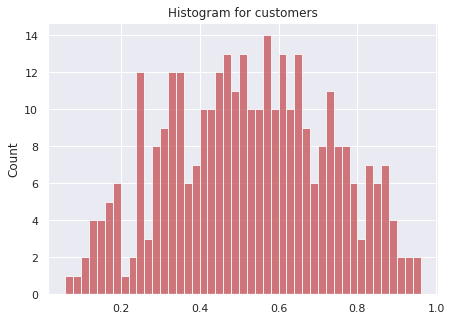

In [38]:
#### We compute the probability obtained for each sample of the test split
probs = rand_forest.predict_proba(X_test)

sns.set(rc={'figure.figsize':(7,5)})
# sns.distplot(customer_dt_summary[col], kde=False)
sns.histplot(probs[...,0], bins = 45)
plt.title("Histogram for noncustomers")
plt.show()

sns.set(rc={'figure.figsize':(7,5)})
# sns.distplot(customer_dt_summary[col], kde=False)
sns.histplot(probs[...,1], bins = 45, color="r")
plt.title("Histogram for customers")
plt.show()


With these histograms we can see that the the mean of both is probably very close to 0.5, and none of them presents an important skew. Therefore, we can deduce that leaving the decision threshold of at 0.5 (which is set by default) is probably the best idea when classifying our database.

### Boosting ensemble: Gradient Tree Boosting

[**EX16**][**CODE**][**REPORT**] Build a **Boosting** ensemble based on Gradient Tree Boosting (GBT). There are several boosting algorithms as Adaboost, etc.  Train the GBT with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to build this type of ensemble.

In [39]:
# Model to fit
grad_tree_boost = GradientBoostingClassifier()

print("\n####### Gradient Tree Boosting Ensemble")
#### --- Cross validation
kfold = KFold(n_splits=5, random_state=10, shuffle=True)
cv_results = cross_val_score(grad_tree_boost, X_train, y_train, cv=kfold, 
    scoring=scoring_metric)

#### --- Training
grad_tree_boost.fit(X_train, y_train)

#### --- Testing
y_pred = grad_tree_boost.predict(X_test)

#### --- Confusion matrix (C).
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))

#### --- Precision and recall
print(classification_report(y_test, y_pred))

#### --- Accuracy
print ("Random Forest Ensemble with accuracy (mean):", cv_results.mean(),
        "and accuracy (std):", cv_results.std())


####### Gradient Tree Boosting Ensemble
Confusion matrix
[[ 98  57]
 [ 62 116]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       155
           1       0.67      0.65      0.66       178

    accuracy                           0.64       333
   macro avg       0.64      0.64      0.64       333
weighted avg       0.64      0.64      0.64       333

Random Forest Ensemble with accuracy (mean): 0.6065669792458674 and accuracy (std): 0.03645695860746456


##### Is it better than any of the previous baseline models? Justify your answer.

In this case the results are literally identical to the ones obtained with the random forest (so the gradient tree boosting ensemble is also better than the baseline models).

With these results it seems plausible that we are somehow limited by either the dataset or the Decision Tree algorithm, since it seems very suspicious that we get such similar results. We are more inclined to think that the main "bottleneck" here is the decision tree model. Even though we are using different kinds of ensemble techniques, the main algorithm for the weak learners (the DT) remains the same, which probably is not capable of giving better results.

Given these results, we also think that it is not probably advisable to fine-tune it more, since it might only lead to overfitting.

[**EX17**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the GBT model for class 0 and class 1. Compare it with histogram of Random Forest. Which one classifies better from your point of view? Why? 

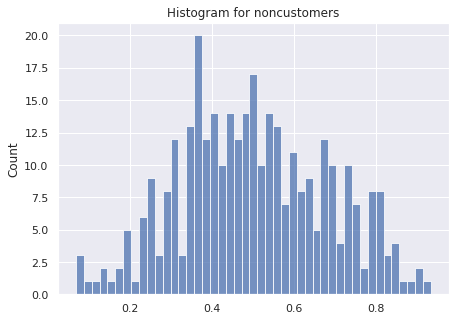

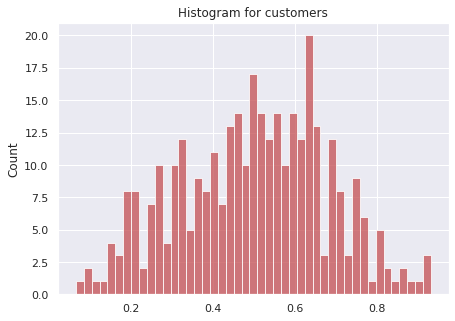

In [42]:
#### We compute the probability obtained for each sample of the test split
probs = grad_tree_boost.predict_proba(X_test)

sns.set(rc={'figure.figsize':(7,5)})
# sns.distplot(customer_dt_summary[col], kde=False)
sns.histplot(probs[...,0], bins = 45)
plt.title("Histogram for noncustomers")
plt.show()

sns.set(rc={'figure.figsize':(7,5)})
# sns.distplot(customer_dt_summary[col], kde=False)
sns.histplot(probs[...,1], bins = 45, color="r")
plt.title("Histogram for customers")
plt.show()

Taking a look at the histograms we see a very interesting behaviour. Even though the precision and recall results are identical when compared to the Random Forest, the histogram seems to be relatively different. In this case, the customers histogram is slightly skewed to the right while the noncustomers histogram is slightly skewed to the left. In this situation, if we desire more precision for the customers class (at the cost of recall), we could probably move the decision threshold to the right in order to achieve such a result.

# 3. Creating a Business opportunity with Machine Learning

The cut-off is the **threshold of the probability of the prediction** to assign to class 0 or class 1 the prediction. If probability > cut-off, the model classifies as 1; otherwise, model classifies as 0. 
The cut-off is a value that can be adjusted to increase the recall or the precision. Usually, there is a **trade-off** between improving the recall-precision.

[**EX18**][**CODE**][**REPORT**] Execute the prediction for the selected model. Adjust the cutoff value to optimize the classifier if you consider necessary. How many **non customers** are you going to send to the sales managers to sell our products to them?




Usually, Marketing department needs to know and understand the main features of the algorithms. The code below returns the importance of each feature of the `training_dataset`.

In [205]:
features=['City_coded','Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY','CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENS', 'Mobile_potential']
features_values=grad_tree_boost.feature_importances_
features_importance=[]
for i in range (len(features)):
    features_importance.append([features[i],features_values[i]])

print(features_importance)

[['City_coded', 0.10832639405830224], ['Revenue', 0.12919392921824188], ['Sector', 0.06582090778211475], ['Legal_Form_Code', 0.09835960996924102], ['CNT_EMPLOYEE', 0.018359134522421987], ['CNT_CB_DENSITY', 0.020804971769248653], ['CNT_CB_MOB_DENSITY', 0.25056850310692647], ['CNT_CB_FN_DENS', 0.12108962917454198], ['Mobile_potential', 0.18747692039896105]]


[**EX19**][**CODE**][**REPORT**] Order the features by importance. Which are the top 3 features to discriminate between **non customers** and **customers**?

In [ ]:
y=sorted(features_importance,key = lambda x: x[1],reverse=True)
print( 'Features ordered by importance: ',y)

 [**EX20**][**REPORT**] In this project, we have used classification techniques to identify potential customers. We have adjusted the main classification parameters as cutoff, recall and precision according to the final purpose: in out case, identify **non customers** that could be interested to buy our products. Consider a new campaign focused on accelerating the sales of an **existing mobile tariff** to our customers. Answer the following questions:
- In this case, which is the **target** variable? Which are **target=0** samples? And **target=1**?
- As the marketing campaing is oriented to our customers we will have further information about them in our internal systems. In particular, we could add to the information of the previous section 3 new variables: data and voice consumption and mobile expense. Adding more data to the dataset may imply more computational data and cost. Would you add these 3 new variables to dataset? Justify your answer.
- Today the mobile tariff is not very popular among our customers. Will the training dataset be balanced or unbalanced? Justify your answer.

Imagine the following scatter plot (`monthly data traffic` vs `monthly voice traffic`):

![<scatter_plot>](scatter_plot.png)
- Describe in terms of `monthly data traffic` and `monthly voice traffic` the **pattern** of target 1 customers
- Draw a plane to separate both classes
- According to the previous plane, which are the customers to be phoned to sell the mobile tariff?
- Could you estimate the **precision** and **recall** of the classification?

*******

# Deliver

Deliver:

* A zip file containing your notebook (.ipynb file) with all the [**CODE**] parts implemented.
* A 5-pages PDF report including all parts of this notebook marked with "[**REPORT**]"

The report should end with the following statement: **We hereby declare that, except for the code provided by the course instructors, all of our code, report, and figures were produced by ourselves.**

We hereby declare that, except for the code provided by the course instructors, all of our code, report, and figures were produced by ourselves.